#### Importing Required libraries & packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
from pandas.io.json import json_normalize 
import xml
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
##!conda install -c conda-forge geopy --yes
##from geopy.geocoders import Nominatim
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

### Creating Hyderabad Data set

In [3]:
Hyd_data = pd.DataFrame({'Borough' : ['East Zone', 'East Zone', 'East Zone', 'East Zone', 'East Zone', 'South Zone', 'South Zone','South Zone','South Zone','South Zone','South Zone','Central Zone', 	'Central Zone', 	'Central Zone', 	'Central Zone', 	'Central Zone', 	'Northeast Zone', 	'Northeast Zone', 	'Northeast Zone', 	'Northeast Zone', 	'Northeast Zone', 	'West Zone', 	'West Zone', 	'West Zone', 	'West Zone', 	'North Zone', 	'North Zone','North Zone','North Zone','North Zone'],
        'Neighborhoods' : ['Kapra', 	'Uppal', 	'Hayathnagar', 	'LB Nagar Erstwhile 3B', 	'Saroornagar', 	'Malakpet', 	'Santoshnagar', 	'Chandrayangutta', 	'Charminar Erstwhile Circle V A', 	'Falaknuma Erstwhile Circle V B', 	'Rajendra Nagar Erstwhile Circle VI', 	'Mehdipatnam Erstwhile Circle VII A', 	'Karwan Erstwhile Circle VII B', 	'Goshamahal Erstwhile Circle VIII', 	'Khairatabad Erstwhile Circle 10A', 	'Jubilee Hills Erstwhile Circle 10B', 	'Amberpet Erstwhile Circle 9B', 	'Musheerabad Erstwhile Circle 9A', 	'Malkajgiri Erstwhile Circle 17', 	'Secunderabad Division Erstwhile Circle 18A', 	'Begumpet Erstwhile Circle 18B', 	'Yousufguda Erstwhile Circle 10C', 	'Serilingampally Erstwhile Circle 11', 	'Chandanagar Erstwhile Circle 12', 	'Ramachandrapuram', 	'Moosapet Erstwhile Circle 14A', 	'Kukatpally Erstwhile Circle 14B', 	'Quthbullapur Erstwhile Circle 15A', 	'Gajula Ramaram Erstwhile Circle 15B', 	'Alwal Erstwhile Circle 16'],
        'Latitude' : [17.49034,	17.39348,	17.3295,	17.443779,	17.355581,	17.379778,	17.34231,	17.325941,	17.361601,	17.333566,	17.31912,	17.390275,	17.38178,	17.380576,	17.411771,	17.430836,	17.390263,	17.419142,	17.448344,	17.443551,	17.44402,	17.43875,	17.465657,	17.487298,	17.508552,	17.468531,	17.493084,	17.496666,	17.52034,	17.502229],
        'Longitude' : [78.57288,	78.559647,	78.59764,	78.444643,	78.535735,	78.499838,	78.50418,	78.474493,	78.474675,	78.471895,	78.39197,	78.436585,	78.42983,	78.468846,	78.4622,	78.410288,	78.516481,	78.498573,	78.528973,	78.496177,	78.462482,	78.427987,	78.340672,	78.332214,	78.302792,	78.42067,	78.405441,	78.460645,	78.44471,	78.508858],
        'Population' : [875944,	752754,	483858,	537441,	903197,	740568,	990929,	672192,	406429,	87403,	666293,	952278,	217661,	132281,	339976,	361503,	915135,	258749,	555753,	92596,	641598,	831668,	688626,	740195,	232686,	478229,	936543,	579291,	767193,	671214,],
        'City' : ['Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad', 	'Hyderabad'],
        'Avg_Income': [20366.98,	27026.85,	52107.86,	48517.59,	66025.22,	62869.1,	35523.9,	74260.29,	72364.31,	69210.05,	50892.87,	32581.83,	9208.98,	67339.81,	98167.33,	145867.43,	44610.27,	72415.6,	45248.61,	55373.23,	66123.49,	54123.68,	17479.82,	28852.55,	68659.16,	69922.52,	48443.96,	12428.76,	15621.78,	30777.58],
        'Avg_House_Rent': [6673.24,	8855.34,	17073.14,	15896.79,	21633.16,	20599.06,	11639.4,	24331.38,	23710.16,	22676.67,	16675.05,	10675.43,	3017.32,	22063.88,	32164.52,	47793.46,	14616.55,	23726.97,	14825.7,	18143.04,	21665.36,	17733.62,	5727.26,	9453.54,	22496.17,	22910.11,	15872.66,	4072.28,	5118.47,	10084.27],
        'Avg_Cost_of_Living' : [10457.42,	13876.93,	26754.78,	24911.35,	33900.65,	32280.14,	18239.74,	38128.94,	37155.45,	35535.9,	26130.94,	16729.14,	4728.35,	34575.62,	50404.01,	74895.63,	22905.14,	37181.79,	23232.9,	28431.38,	33951.1,	27789.8,	8975.01,	14814.34,	35253.04,	35901.72,	24873.55,	6381.55,	8021,	15802.74]                 
                          })
Hyd_data

,Borough,Neighborhoods,Latitude,Longitude,Population,City,Avg_Income,Avg_House_Rent,Avg_Cost_of_Living
0,East Zone,Kapra,17.490340,78.572880,875944,Hyderabad,20366.98,6673.24,10457.42
1,East Zone,Uppal,17.393480,78.559647,752754,Hyderabad,27026.85,8855.34,13876.93
2,East Zone,Hayathnagar,17.329500,78.597640,483858,Hyderabad,52107.86,17073.14,26754.78
3,East Zone,LB Nagar Erstwhile 3B,17.443779,78.444643,537441,Hyderabad,48517.59,15896.79,24911.35
4,East Zone,Saroornagar,17.355581,78.535735,903197,Hyderabad,66025.22,21633.16,33900.65
5,South Zone,Malakpet,17.379778,78.499838,740568,Hyderabad,62869.10,20599.06,32280.14
6,South Zone,Santoshnagar,17.342310,78.504180,990929,Hyderabad,35523.90,11639.40,18239.74
7,South Zone,Chandrayangutta,17.325941,78.474493,672192,Hyderabad,74260.29,24331.38,38128.94
8,South Zone,Charminar Erstwhile Circle V A,17.361601,78.474675,406429,Hyderabad,72364.31,23710.16,37155.45
9,South Zone,Falaknuma Erstwhile Circle V B,17.333566,78.471895,87403,Hyderabad,69210.05,22676.67,35535.90


Note: Due to accurate data unavailable in public sources - Some values in above are assumptions.

In [4]:
Hyd_data.describe()

,Latitude,Longitude,Population,Avg_Income,Avg_House_Rent,Avg_Cost_of_Living
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,17.419889,78.462734,583672.766667,52080.380333,17064.133333,26740.668333
std,0.061090,0.068055,272366.248924,28300.719768,9272.730730,14531.004526
min,17.319120,78.302792,87403.000000,9208.980000,3017.320000,4728.350000
25%,17.379978,78.428448,372734.500000,31228.642500,10232.060000,16034.340000
50%,17.424989,78.465664,653945.500000,51500.365000,16874.095000,26442.860000
75%,17.467813,78.503095,763583.250000,68329.322500,22388.097500,35083.685000
max,17.520340,78.597640,990929.000000,145867.430000,47793.460000,74895.630000


In [29]:
address = 'Hyderabad,India'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Hyderabad,Indian are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Hyderabad,Indian are 17.38878595, 78.46106473453146.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


### Creating Hyderabad Map

In [30]:
Hyd_map = folium.Map(location=[latitude_x, longitude_y], zoom_start=11.3)

for lat, lng, nei in zip(Hyd_data['Latitude'], Hyd_data['Longitude'], Hyd_data['Neighborhoods']):
    
    label = Hyd_data['Neighborhoods']
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label).add_to(Hyd_map)

Hyd_map

#### Using Foursquare API

In [31]:
# The code was removed by Watson Studio for sharing.

In [32]:
radius = 1500 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_x, 
   longitude_y, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [34]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.id', 'venue.location.address', 'venue.location.cc',
       'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [35]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Exploring Nearby Venues

In [36]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Subhan Bakery,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",17.392412,78.464712
1,Cafe Niloufer & Bakers,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",17.399715,78.462881
2,Laxman Ki Bandi,"[{'id': '54135bf5e4b08f3d2429dfde', 'name': 'S...",17.378895,78.463973
3,Milan Juice Center,"[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",17.392266,78.458102
4,Baskin Robbins Red Hills,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",17.401600,78.463727


In [37]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Subhan Bakery,Bakery,17.392412,78.464712
1,Cafe Niloufer & Bakers,Café,17.399715,78.462881
2,Laxman Ki Bandi,South Indian Restaurant,17.378895,78.463973
3,Milan Juice Center,Snack Place,17.392266,78.458102
4,Baskin Robbins Red Hills,Ice Cream Shop,17.401600,78.463727
5,Hotel Marjaan,Café,17.395373,78.455115
6,Al-humdulillah Hotel,Indian Restaurant,17.390728,78.462992
7,Al-Yousufain Fast Food Center,Fried Chicken Joint,17.391338,78.470147
8,Hotel Royalton,Hotel,17.393211,78.473504
9,Hyderabad Sporting Club.,Soccer Field,17.395373,78.452179


In [38]:
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Café                       2
Snack Place                1
Bakery                     1
Soccer Field               1
Ice Cream Shop             1
South Indian Restaurant    1
Indian Restaurant          1
Fried Chicken Joint        1
Hotel                      1
Name: categories, dtype: int64

In [46]:
def getNearbyVenues(Borough, names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for Borough, name, lat, lng in zip(Borough, names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            Borough,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 'Neighborhoods', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [48]:
Hyd_venues = getNearbyVenues(Borough = Hyd_data['Borough'], names=Hyd_data['Neighborhoods'],
                                   latitudes=Hyd_data['Latitude'],
                                   longitudes=Hyd_data['Longitude']
                                  )

Kapra
Uppal
Hayathnagar
LB Nagar Erstwhile 3B
Saroornagar
Malakpet
Santoshnagar
Chandrayangutta
Charminar Erstwhile Circle V A
Falaknuma Erstwhile Circle V B
Rajendra Nagar Erstwhile Circle VI
Mehdipatnam Erstwhile Circle VII A
Karwan Erstwhile Circle VII B
Goshamahal Erstwhile Circle VIII
Khairatabad Erstwhile Circle 10A
Jubilee Hills Erstwhile Circle 10B
Amberpet Erstwhile Circle 9B
Musheerabad Erstwhile Circle 9A
Malkajgiri Erstwhile Circle 17
Secunderabad Division Erstwhile Circle 18A
Begumpet Erstwhile Circle 18B
Yousufguda Erstwhile Circle 10C
Serilingampally Erstwhile Circle 11
Chandanagar Erstwhile Circle 12
Ramachandrapuram
Moosapet Erstwhile Circle 14A
Kukatpally Erstwhile Circle 14B
Quthbullapur Erstwhile Circle 15A
Gajula Ramaram Erstwhile Circle 15B
Alwal Erstwhile Circle 16


In [51]:
# Finding Unique Categories
print('There are {} Uniques Categories.'.format(len(Hyd_venues['Venue Category'].unique())))
Hyd_venues.groupby('Borough').count()

There are 111 Uniques Categories.


,Neighborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,,
Central Zone,245,245,245,245,245,245,245
East Zone,73,73,73,73,73,73,73
North Zone,57,57,57,57,57,57,57
Northeast Zone,137,137,137,137,137,137,137
South Zone,49,49,49,49,49,49,49
West Zone,53,53,53,53,53,53,53


In [85]:
Hyd_venues.head(10)

,Borough,Neighborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,East Zone,Kapra,17.49034,78.572880,Apollo Pharmacy,17.490776,78.573792,Pharmacy
1,East Zone,Kapra,17.49034,78.572880,Big Bull Bakery,17.492283,78.565074,Bakery
2,East Zone,Kapra,17.49034,78.572880,Blue parks bar,17.483349,78.562201,Bar
3,East Zone,Kapra,17.49034,78.572880,Vijaya Plywood,17.477331,78.574005,Furniture / Home Store
4,East Zone,Kapra,17.49034,78.572880,Thalluri Theatres,17.477694,78.572620,Multiplex
5,East Zone,Uppal,17.39348,78.559647,Metro,17.391966,78.559706,Convenience Store
6,East Zone,Uppal,17.39348,78.559647,Nagole HMR Station,17.391336,78.558846,Light Rail Station
7,East Zone,Uppal,17.39348,78.559647,HMR Uppal Depot,17.390554,78.555524,Train Station
8,East Zone,Uppal,17.39348,78.559647,Uppal Bus Stand,17.401500,78.568899,Bus Station
9,East Zone,Uppal,17.39348,78.559647,Vegetable Market,17.401691,78.569595,Flea Market


In [53]:
individual_Hyd_venue_count = Hyd_venues.groupby(['Borough','Neighborhoods'])['Borough'].count().to_frame()
individual_Hyd_venue_count

Borough
Borough        Neighborhoods                                      
Central Zone   Goshamahal Erstwhile Circle VIII                 26
               Jubilee Hills Erstwhile Circle 10B              100
               Karwan Erstwhile Circle VII B                    10
               Khairatabad Erstwhile Circle 10A                 88
               Mehdipatnam Erstwhile Circle VII A               21
East Zone      Hayathnagar                                       4
               Kapra                                             5
               LB Nagar Erstwhile 3B                            40
               Saroornagar                                      19
               Uppal                                             5
North Zone     Alwal Erstwhile Circle 16                         6
               Gajula Ramaram Erstwhile Circle 15B               4
               Kukatpally Erstwhile Circle 14B                  34
               Moosapet Erstwhile Circle 14A                     8
               Quthbullapur Erstwhile Circle 15A                 5
Northeast Zone Amberpet Erstwhile Circle 9B                     13
               Begumpet Erstwhile Circle 18B                    33
               Malkajgiri Erstwhile Circle 17                   12
               Musheerabad Erstwhile Circle 9A                  22
               Secunderabad Division Erstwhile Circle 18A       57
South Zone     Chandrayangutta                                   7
               Charminar Erstwhile Circle V A                   13
               Falaknuma Erstwhile Circle V B                    5
               Malakpet                                         17
               Rajendra Nagar Erstwhile Circle VI                2
               Santoshnagar                                      5
West Zone      Chandanagar Erstwhile Circle 12                  11
               Ramachandrapuram                                  4
               Serilingampally Erstwhile Circle 11               8
               Yousufguda Erstwhile Circle 10C                  30

In [56]:
individual_Hyd_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)
individual_Hyd_venue_count.reset_index(inplace=True)
individual_Hyd_venue_count

,Borough,Neighborhoods,NumberOfVenues
0,Central Zone,Goshamahal Erstwhile Circle VIII,26
1,Central Zone,Jubilee Hills Erstwhile Circle 10B,100
2,Central Zone,Karwan Erstwhile Circle VII B,10
3,Central Zone,Khairatabad Erstwhile Circle 10A,88
4,Central Zone,Mehdipatnam Erstwhile Circle VII A,21
5,East Zone,Hayathnagar,4
6,East Zone,Kapra,5
7,East Zone,LB Nagar Erstwhile 3B,40
8,East Zone,Saroornagar,19
9,East Zone,Uppal,5


[Text(0, 0, 'Goshamahal Erstwhile Circle VIII'),
 Text(0, 0, 'Jubilee Hills Erstwhile Circle 10B'),
 Text(0, 0, 'Karwan Erstwhile Circle VII B'),
 Text(0, 0, 'Khairatabad Erstwhile Circle 10A'),
 Text(0, 0, 'Mehdipatnam Erstwhile Circle VII A'),
 Text(0, 0, 'Hayathnagar'),
 Text(0, 0, 'Kapra'),
 Text(0, 0, 'LB Nagar Erstwhile 3B'),
 Text(0, 0, 'Saroornagar'),
 Text(0, 0, 'Uppal'),
 Text(0, 0, 'Alwal Erstwhile Circle 16'),
 Text(0, 0, 'Gajula Ramaram Erstwhile Circle 15B'),
 Text(0, 0, 'Kukatpally Erstwhile Circle 14B'),
 Text(0, 0, 'Moosapet Erstwhile Circle 14A'),
 Text(0, 0, 'Quthbullapur Erstwhile Circle 15A'),
 Text(0, 0, 'Amberpet Erstwhile Circle 9B'),
 Text(0, 0, 'Begumpet Erstwhile Circle 18B'),
 Text(0, 0, 'Malkajgiri Erstwhile Circle 17'),
 Text(0, 0, 'Musheerabad Erstwhile Circle 9A'),
 Text(0, 0, 'Secunderabad Division Erstwhile Circle 18A'),
 Text(0, 0, 'Chandrayangutta'),
 Text(0, 0, 'Charminar Erstwhile Circle V A'),
 Text(0, 0, 'Falaknuma Erstwhile Circle V B'),
 Text(0

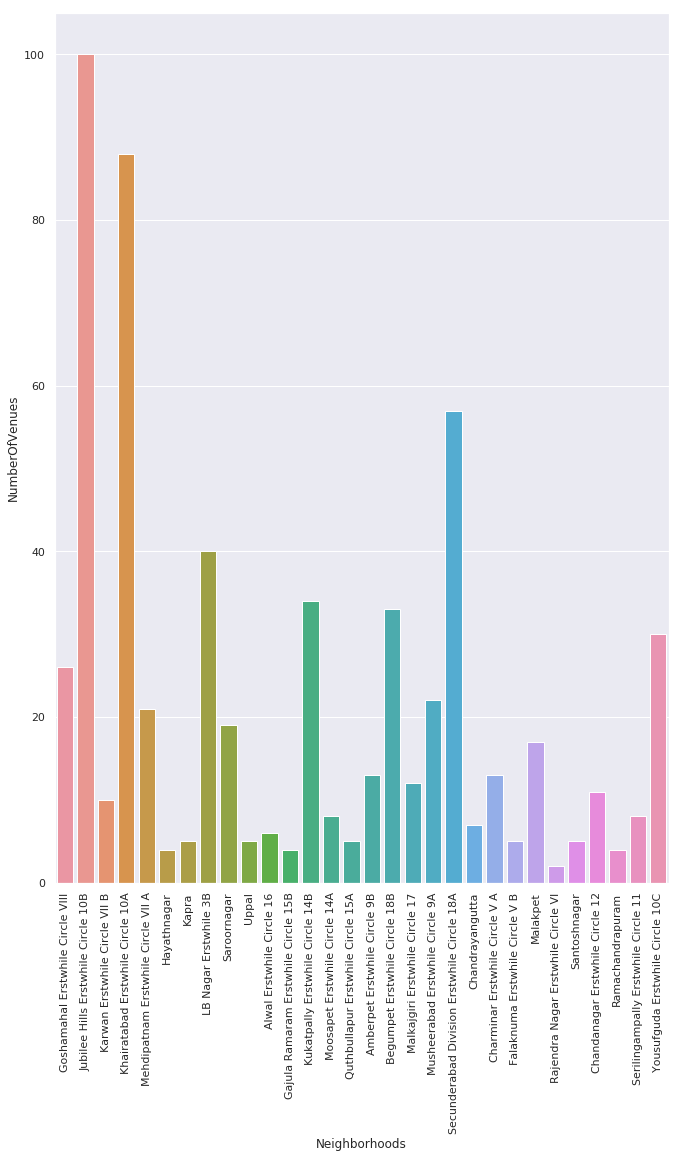

In [58]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhoods',y='NumberOfVenues',data=individual_Hyd_venue_count)
plot.set_xticklabels(individual_Hyd_venue_count['Neighborhoods'],rotation=90)

##### One Hot Encoding

In [59]:
# one hot encoding
Hyd_onehot = pd.get_dummies(Hyd_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Hyd_onehot['Neighborhoods'] = Hyd_venues['Neighborhoods'] 

# move neighborhoods column to the first column
fixed_columns = [Hyd_onehot.columns[-1]] + list(Hyd_onehot.columns[:-1])
Hyd_onehot = Hyd_onehot[fixed_columns]
Hyd_grouped = Hyd_onehot.groupby('Neighborhoods').mean().reset_index()
Hyd_onehot.head(5)

,Neighborhoods,ATM,Accessories Store,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Bistro,...,Social Club,South Indian Restaurant,Spa,Sports Bar,Stadium,Tea Room,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,Kapra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kapra,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kapra,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kapra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kapra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploring Top 10 venues

In [60]:
num_top_venues = 10 
for hood in Hyd_grouped['Neighborhoods']:
    print("---- "+hood+" ----")
    temp =Hyd_grouped[Hyd_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Alwal Erstwhile Circle 16 ----
                       venue  freq
0             Breakfast Spot  0.17
1           Department Store  0.17
2          Indian Restaurant  0.17
3                        Gym  0.17
4              Grocery Store  0.17
5                Bus Station  0.17
6                        ATM  0.00
7              Metro Station  0.00
8  Middle Eastern Restaurant  0.00
9          Mobile Phone Shop  0.00


---- Amberpet Erstwhile Circle 9B ----
               venue  freq
0  Indian Restaurant  0.31
1               Café  0.08
2      Train Station  0.08
3      Movie Theater  0.08
4        Flea Market  0.08
5        Pizza Place  0.08
6  Convenience Store  0.08
7  Food & Drink Shop  0.08
8         Food Court  0.08
9     Sandwich Place  0.08


---- Begumpet Erstwhile Circle 18B ----
                           venue  freq
0              Indian Restaurant  0.24
1                          Hotel  0.12
2  Vegetarian / Vegan Restaurant  0.06
3                 Clothing Store  0.06
4   

In [61]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Exploring - Neighborhoods - Most common venues

In [62]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] =Hyd_grouped['Neighborhoods']

for ind in np.arange(Hyd_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Hyd_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alwal Erstwhile Circle 16,Department Store,Indian Restaurant,Breakfast Spot,Bus Station,Grocery Store,Gym,Gastropub,Food & Drink Shop,Diner,Discount Store
1,Amberpet Erstwhile Circle 9B,Indian Restaurant,Food & Drink Shop,Café,Flea Market,Movie Theater,Food Court,Pizza Place,Sandwich Place,Convenience Store,Train Station
2,Begumpet Erstwhile Circle 18B,Indian Restaurant,Hotel,Clothing Store,Vegetarian / Vegan Restaurant,Light Rail Station,Cocktail Bar,Chinese Restaurant,Pizza Place,Pub,Café
3,Chandanagar Erstwhile Circle 12,Convenience Store,Train Station,Accessories Store,Pizza Place,Stadium,Multiplex,Diner,South Indian Restaurant,Bakery,Department Store
4,Chandrayangutta,Middle Eastern Restaurant,Italian Restaurant,Train Station,Indian Restaurant,Breakfast Spot,Resort,Food & Drink Shop,Diner,Discount Store,Donut Shop
5,Charminar Erstwhile Circle V A,History Museum,Bus Station,Indian Restaurant,Monument / Landmark,Coffee Shop,Food Court,Café,Juice Bar,Dessert Shop,Diner
6,Falaknuma Erstwhile Circle V B,Train Station,Resort,Italian Restaurant,Breakfast Spot,Indian Restaurant,Women's Store,Farmers Market,Flea Market,Fast Food Restaurant,Falafel Restaurant
7,Gajula Ramaram Erstwhile Circle 15B,ATM,Pizza Place,Café,Food & Drink Shop,Dessert Shop,Diner,Discount Store,Donut Shop,Electronics Store,Falafel Restaurant
8,Goshamahal Erstwhile Circle VIII,Indian Restaurant,Bakery,Hotel,Bus Station,Shoe Store,Department Store,Neighborhood,Farmers Market,Flea Market,Food
9,Hayathnagar,ATM,Pharmacy,Mattress Store,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Electronics Store,Falafel Restaurant


### Clustering - K-Means approach

In [71]:
# Using K-Means to cluster neighborhoods into 3 clusters
Hyd_grouped_clustering = Hyd_grouped.drop('Neighborhoods', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Hyd_grouped_clustering)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

<B>Merging Hyderabad main table data and neighborhoods_venues_sorted data</B>

In [73]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Hyd_merged =Hyd_data.iloc[:20,:]

# merging Hyd_grouped with Hyd_data to add latitude/longitude for each neighborhood
Hyd_merged = Hyd_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhoods')

Hyd_merged.head()

,Borough,Neighborhoods,Latitude,Longitude,Population,City,Avg_Income,Avg_House_Rent,Avg_Cost_of_Living,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Zone,Kapra,17.490340,78.572880,875944,Hyderabad,20366.98,6673.24,10457.42,1,Bakery,Bar,Pharmacy,Furniture / Home Store,Multiplex,Women's Store,Food,Dessert Shop,Diner,Discount Store
1,East Zone,Uppal,17.393480,78.559647,752754,Hyderabad,27026.85,8855.34,13876.93,1,Bus Station,Train Station,Convenience Store,Flea Market,Light Rail Station,Women's Store,Diner,Discount Store,Donut Shop,Electronics Store
2,East Zone,Hayathnagar,17.329500,78.597640,483858,Hyderabad,52107.86,17073.14,26754.78,0,ATM,Pharmacy,Mattress Store,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Electronics Store,Falafel Restaurant
3,East Zone,LB Nagar Erstwhile 3B,17.443779,78.444643,537441,Hyderabad,48517.59,15896.79,24911.35,1,Indian Restaurant,Café,Bakery,Snack Place,Hotel,Farmers Market,Bus Station,Train Station,Deli / Bodega,Department Store
4,East Zone,Saroornagar,17.355581,78.535735,903197,Hyderabad,66025.22,21633.16,33900.65,1,Indian Restaurant,Shopping Mall,Movie Theater,Multiplex,Coffee Shop,Lake,Restaurant,Department Store,Bowling Alley,Hyderabadi Restaurant


### Creating Map for Clusters

In [83]:
kclusters = 5

In [84]:
## Creating Map

map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Hyd_merged['Latitude'], 
                                   Hyd_merged['Longitude'], 
                                   Hyd_merged['Neighborhoods'], 
                                   Hyd_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']


### Exploring Hyderabad Data further to findout the Avg House Rent & Cost of Living(COL)

<b>Copying Hyderabad data into new data frame to make sure that there's no issue for main data set</b>

In [77]:
Hyd_Avg_Rent_and_COL_anlaysis = pd.DataFrame({'Borough' : ['East Zone', 'East Zone', 'East Zone', 'East Zone', 'East Zone', 'South Zone', 'South Zone','South Zone','South Zone','South Zone','South Zone','Central Zone', 	'Central Zone', 	'Central Zone', 	'Central Zone', 	'Central Zone', 	'Northeast Zone', 	'Northeast Zone', 	'Northeast Zone', 	'Northeast Zone', 	'Northeast Zone', 	'West Zone', 	'West Zone', 	'West Zone', 	'West Zone', 	'North Zone', 	'North Zone','North Zone','North Zone','North Zone'],
        'Neighborhoods' : ['Kapra', 	'Uppal', 	'Hayathnagar', 	'LB Nagar Erstwhile 3B', 	'Saroornagar', 	'Malakpet', 	'Santoshnagar', 	'Chandrayangutta', 	'Charminar Erstwhile Circle V A', 	'Falaknuma Erstwhile Circle V B', 	'Rajendra Nagar Erstwhile Circle VI', 	'Mehdipatnam Erstwhile Circle VII A', 	'Karwan Erstwhile Circle VII B', 	'Goshamahal Erstwhile Circle VIII', 	'Khairatabad Erstwhile Circle 10A', 	'Jubilee Hills Erstwhile Circle 10B', 	'Amberpet Erstwhile Circle 9B', 	'Musheerabad Erstwhile Circle 9A', 	'Malkajgiri Erstwhile Circle 17', 	'Secunderabad Division Erstwhile Circle 18A', 	'Begumpet Erstwhile Circle 18B', 	'Yousufguda Erstwhile Circle 10C', 	'Serilingampally Erstwhile Circle 11', 	'Chandanagar Erstwhile Circle 12', 	'Ramachandrapuram', 	'Moosapet Erstwhile Circle 14A', 	'Kukatpally Erstwhile Circle 14B', 	'Quthbullapur Erstwhile Circle 15A', 	'Gajula Ramaram Erstwhile Circle 15B', 	'Alwal Erstwhile Circle 16'],
        'Avg_House_Rent': [6673.24,	8855.34,	17073.14,	15896.79,	21633.16,	20599.06,	11639.4,	24331.38,	23710.16,	22676.67,	16675.05,	10675.43,	3017.32,	22063.88,	32164.52,	47793.46,	14616.55,	23726.97,	14825.7,	18143.04,	21665.36,	17733.62,	5727.26,	9453.54,	22496.17,	22910.11,	15872.66,	4072.28,	5118.47,	10084.27],
        'Avg_Cost_of_Living' : [10457.42,	13876.93,	26754.78,	24911.35,	33900.65,	32280.14,	18239.74,	38128.94,	37155.45,	35535.9,	26130.94,	16729.14,	4728.35,	34575.62,	50404.01,	74895.63,	22905.14,	37181.79,	23232.9,	28431.38,	33951.1,	27789.8,	8975.01,	14814.34,	35253.04,	35901.72,	24873.55,	6381.55,	8021,	15802.74]                        
                          })
Hyd_Avg_Rent_and_COL_anlaysis.head()

,Borough,Neighborhoods,Avg_House_Rent,Avg_Cost_of_Living
0,East Zone,Kapra,6673.24,10457.42
1,East Zone,Uppal,8855.34,13876.93
2,East Zone,Hayathnagar,17073.14,26754.78
3,East Zone,LB Nagar Erstwhile 3B,15896.79,24911.35
4,East Zone,Saroornagar,21633.16,33900.65


In [78]:
Hyd_Avg_Rent_and_COL_anlaysis.set_index('Neighborhoods',inplace=True,drop=True)

In [79]:
Hyd_Avg_Rent_and_COL_anlaysis

,Borough,Avg_House_Rent,Avg_Cost_of_Living
Neighborhoods,,,
Kapra,East Zone,6673.24,10457.42
Uppal,East Zone,8855.34,13876.93
Hayathnagar,East Zone,17073.14,26754.78
LB Nagar Erstwhile 3B,East Zone,15896.79,24911.35
Saroornagar,East Zone,21633.16,33900.65
Malakpet,South Zone,20599.06,32280.14
Santoshnagar,South Zone,11639.40,18239.74
Chandrayangutta,South Zone,24331.38,38128.94
Charminar Erstwhile Circle V A,South Zone,23710.16,37155.45


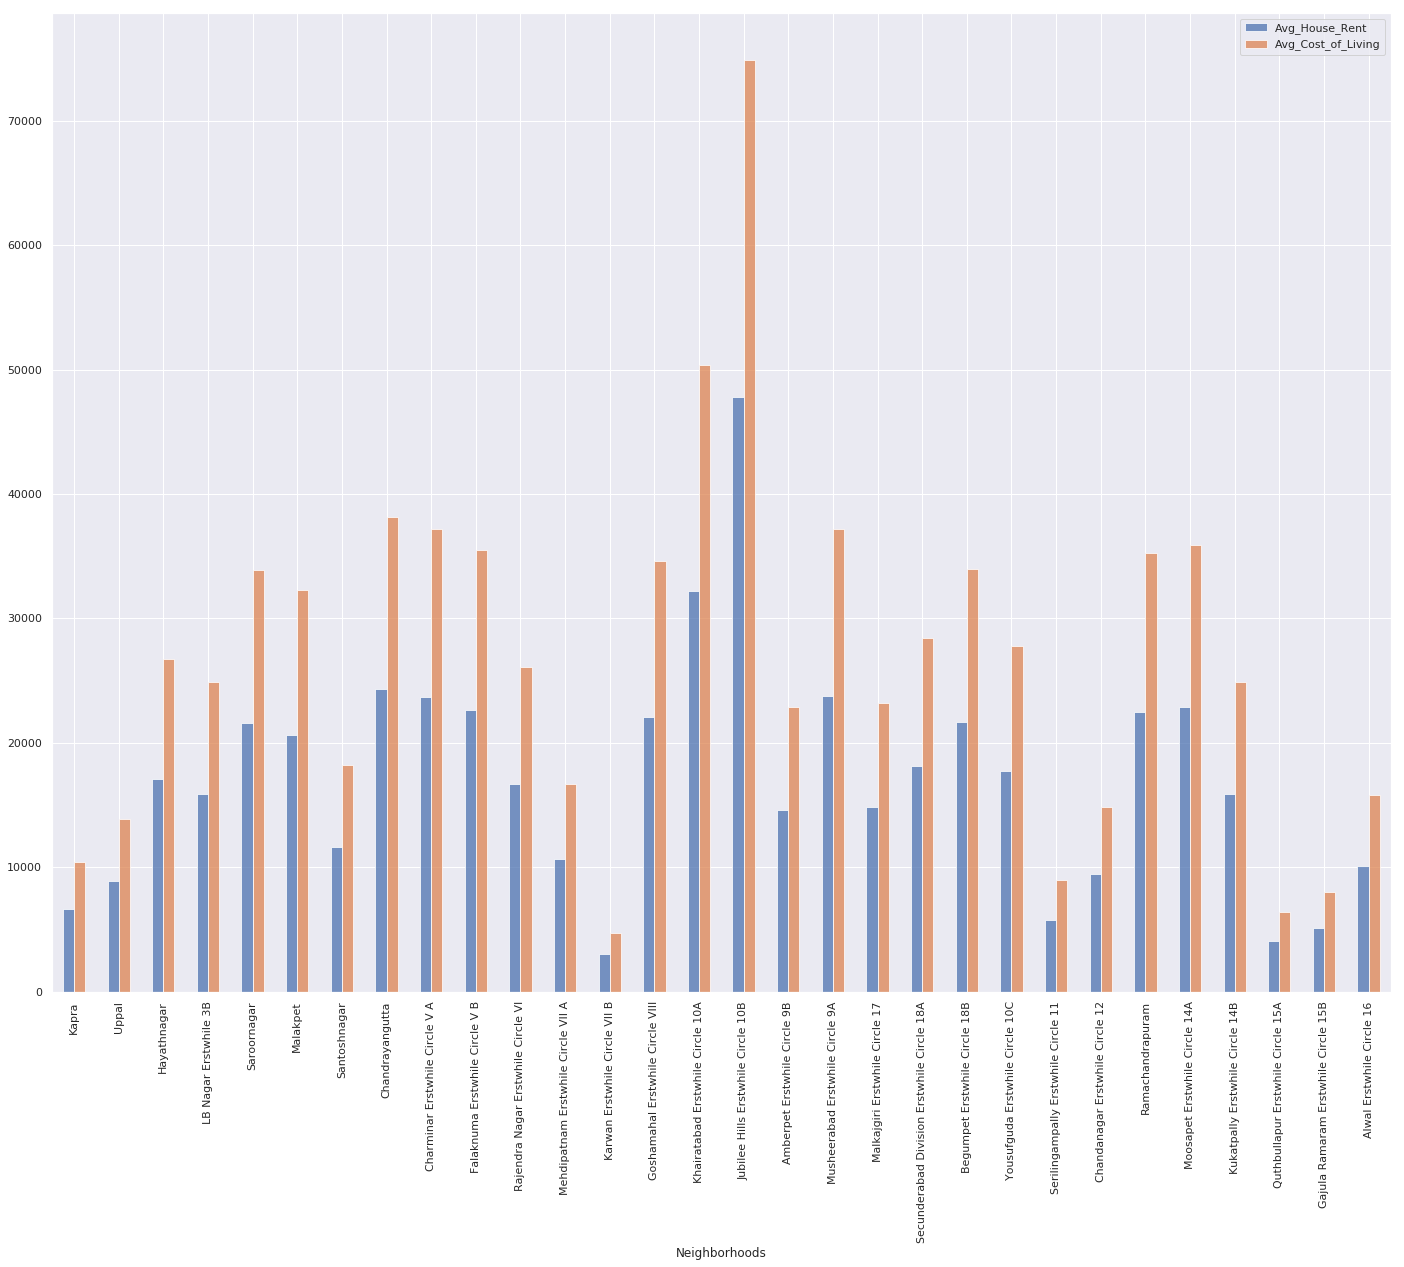

In [80]:
Hyd_Avg_Rent_and_COL_anlaysis.plot(kind='bar',figsize=(24,18),alpha=0.75 )

### Conlusion:

* Explored Near by venues, Top venues and Common venues for Hyderabad Neighborhoods:
    * It gives good information about the nearest shops, restaurants, gyms, Malls, Multiplex theaters, Schools and etc.
* Also executed Avg house rent and Avg cost of living for the Neighborhoods.
* Based on all above, it gives good information to the people who would like to stay and explore Hyderabad.

##### It is just begining and there's more to explore. . Happy Learning.

##### Thank you !